In [151]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report
import seaborn as sn

In [152]:
data=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.shape

(7043, 21)

In [153]:
data.head().transpose()

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [154]:
data.drop(columns='customerID',axis='columns',inplace=True)

In [155]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [156]:
data.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [157]:
#data[pd.to_numeric(data.TotalCharges,errors='coerce').isnull()]
data.TotalCharges=pd.to_numeric(data.TotalCharges,errors='coerce')

In [158]:
data.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [159]:
#data=data[data['TotalCharges']!=' ']
data.dropna(inplace=True)
data.shape

(7032, 20)

In [160]:
data['tenure']

0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7032, dtype: int64

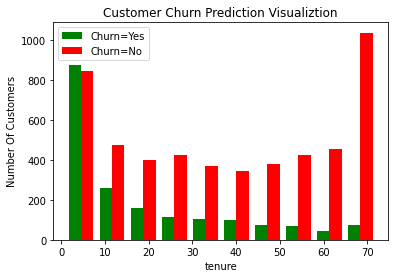

In [161]:
data_churn_yes_tenure=data[data.Churn=='Yes'].tenure
data_churn_no_tenure=data[data.Churn=='No'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.hist([data_churn_yes_tenure,data_churn_no_tenure],label=['Churn=Yes','Churn=No'],color=['green','red'])
plt.legend()
plt.show()

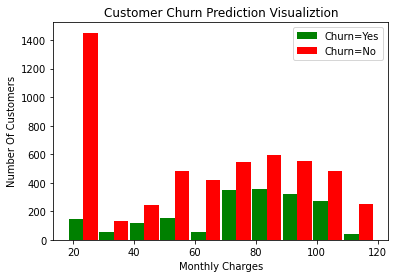

In [162]:
mc_churn_no = data[data.Churn=='No'].MonthlyCharges      
mc_churn_yes = data[data.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")


plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [163]:
def print_unique(data):
    for column in data.columns:
        if data[column].dtypes=='object':
            print(f'{column}:{data[column].unique()}')
print_unique(data)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [164]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    data[col].replace({'Yes': 1,'No': 0},inplace=True)

In [165]:
data.replace('No internet service','No',inplace=True)
data.replace('No phone service','No',inplace=True)
data['gender'].replace({'Female':1,'Male':0},inplace=True)
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    data[col].replace({'Yes': 1,'No': 0},inplace=True)
for col in data:
    print(f'{col}: {data[col].unique()}') 
data= pd.get_dummies(data=data, columns=['InternetService','Contract','PaymentMethod'])
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']
scaler = MinMaxScaler()
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])
data.shape

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


(7032, 27)

In [166]:
X = data.drop('Churn',axis='columns')
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)
X_train.shape

(5625, 26)

In [167]:
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.4834 - accuracy: 0.7652
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4263 - accuracy: 0.7936
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4194 - accuracy: 0.7988
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4155 - accuracy: 0.8034
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4136 - accuracy: 0.8048
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4119 - accuracy: 0.8053
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4101 - accuracy: 0.8078
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4079 - accuracy: 0.8084
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4076 - accuracy: 0.8092
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4050 - accura

In [168]:
model.evaluate(X_test, y_test)
yp = model.predict(X_test)
y_pred = [1 if element > 0.5 else 0 for element in yp  ]

44/44 [==============================] - 0s 2ms/step


              precision    recall  f1-score   support

           0       0.82      0.87      0.84       999
           1       0.62      0.52      0.57       408

    accuracy                           0.77      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.76      0.77      0.76      1407



Text(69.0, 0.5, 'Truth')

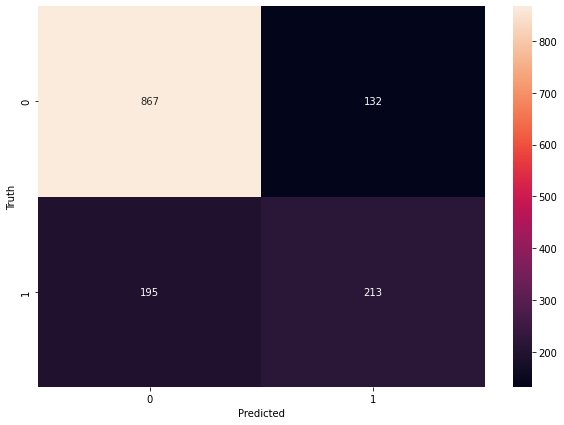

In [169]:
print(classification_report(y_test,y_pred))

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')